In [1]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np, pandas as pd, os
from prettytable import PrettyTable

In [2]:
feature_names = list()
for index in range(1, 6):
    feature_names.extend(["Suit"+str(index), "Rank"+str(index)])

feature_names.append('class')


training_input_file = os.path.abspath('poker-hand-training-true.csv')
testing_input_file = os.path.abspath('poker-hand-testing.csv')

np.random.seed(350)     # seed for reproducible results

# To store configs
class myConfigs:
    features = 0
    classes = 0


config = myConfigs()

In [3]:

train_data = pd.read_csv(training_input_file, names=feature_names)
test_data = pd.read_csv(testing_input_file, names=feature_names)

# Get features of data
config.features = len(train_data.columns) - 1
config.classes = len(set(train_data['class']))

# Shuffle training data
train_data = train_data.sample(frac=1).reset_index(drop=True)

# Seperate data and classes
train_y = np.array(train_data['class'])
train_x = np.array(train_data.drop('class', 1))

test_y = np.array(test_data['class'])
test_x = np.array(test_data.drop('class', 1))

# Initialise scaler to scale the data
scaler = StandardScaler()

train_set = np.empty(train_x.shape, dtype = float)
test_set = np.empty(test_x.shape, dtype = float)

# Make training data suitable for scaling
for index in range(len(train_x)):
    train_set[index] = train_x[index].astype(float)

# Make testing data suitable for scaling
for index in range(len(test_x)):
    test_set[index] = test_x[index].astype(float)

# Fit the training data
scaler.fit(train_set)  

# Scale the training and testing data w.r.t scaler
data_train = scaler.transform(train_set)
data_test = scaler.transform(test_set)

tab = PrettyTable(['Config', 'Value'])
configs = vars(config)

for key in configs:
    tab.add_row([key, configs[key]])
print(tab)

print("Instances in training data :", len(train_data))
print("Instances in testing data :", len(test_data))

+----------+-------+
|  Config  | Value |
+----------+-------+
| features |   10  |
| classes  |   10  |
+----------+-------+
Instances in training data : 25010
Instances in testing data : 1000000


In [29]:

accuracy = list()

predictions = list()

for trial in range(5):
    classifier = MLPClassifier(solver = 'adam', alpha = 1e-5, hidden_layer_sizes = (52,52), activation = 'tanh', learning_rate_init = 0.01, max_iter = 200, random_state = trial)
    result = classifier.fit(data_train, train_y)
    prediction = classifier.predict(data_test)
    predictions.append(prediction)
    curr_accuracy = accuracy_score(test_y, prediction)
    accuracy.append(curr_accuracy)

Test    : 1
Accuracy : 97.732


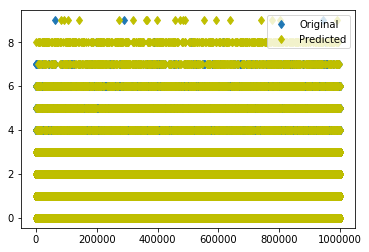

Test    : 2
Accuracy : 98.546


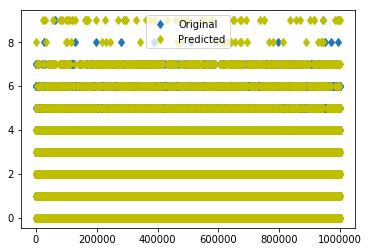

Test    : 3
Accuracy : 98.656


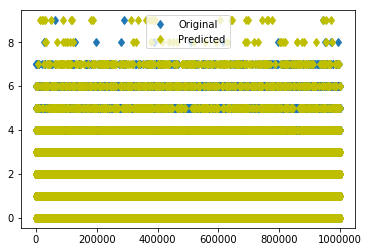

Test    : 4
Accuracy : 98.703


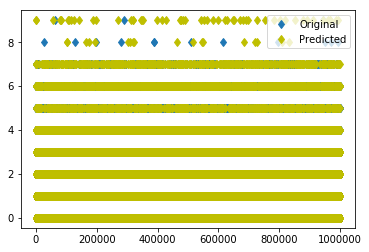

Test    : 5
Accuracy : 98.999


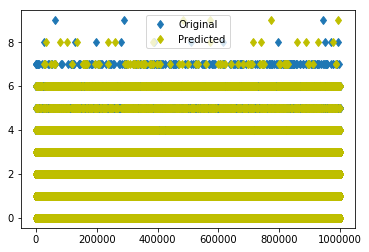

In [30]:

for index in range(len(predictions)):
    print("Test    :", index + 1)
    print("Accuracy :", round(accuracy[index] * 100, 3))
    plt.plot(test_y, 'd', label = "Original")
    plt.plot(predictions[index], 'yd', label = "Predicted")
    plt.legend()
    plt.show()